In [187]:
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

sns.set(font_scale=3)

pd.set_option("display.max_columns", 200)
pd.set_option("display.max_rows", 2000)


In [188]:
upro_data = pd.read_csv('https://query1.finance.yahoo.com/v7/finance/download/UPRO?period1=1454371200&period2=1612224000&interval=1d&events=history&includeAdjustedClose=true')

# upro_data = pd.read_csv('https://query1.finance.yahoo.com/v7/finance/download/UPRO?period1=1611014400&period2=1612224000&interval=1d&events=history&includeAdjustedClose=true')
upro_data = upro_data.drop(columns=['High', 'Low', 'Adj Close', 'Volume'])

upro_data = upro_data.sort_values(by=['Date'], ascending=False)

In [154]:
upro_data['1_ago_close'] = upro_data['Close'].shift(-1)
upro_data['1_ago_close_percent'] = 1 - upro_data['Close'] / upro_data['1_ago_close']
upro_data['open_close_percent'] = 1 - upro_data['Close'] / upro_data['Open']

In [189]:
upro_data['open_close_percent'] = 1 - upro_data['Open'] / upro_data['Close']
upro_data['yesterday_close'] = upro_data['Close'].shift(-1)
upro_data['gain_last_day_close_to_close'] = upro_data['Close'] / upro_data[f'yesterday_close']

days_back = 7
for x in range(2, days_back + 1):
    upro_data[f'{x}_ago_close'] = upro_data['Close'].shift(x*-1)
    upro_data[f'{x}_ago_close_percent'] = upro_data['yesterday_close'] / upro_data[f'{x}_ago_close']
upro_data.drop(upro_data.tail(days_back).index,inplace=True)
upro_data

,Date,Open,Close,open_close_percent,yesterday_close,gain_last_day_close_to_close,2_ago_close,2_ago_close_percent,3_ago_close,3_ago_close_percent,4_ago_close,4_ago_close_percent,5_ago_close,5_ago_close_percent,6_ago_close,6_ago_close_percent,7_ago_close,7_ago_close_percent
1258,2021-02-01,76.120003,77.540001,0.018313,74.010002,1.047696,78.639999,0.941124,76.709999,0.964803,82.809998,0.893733,83.199997,0.889543,82.209999,0.900255,83.050003,0.891150
1257,2021-01-29,77.400002,74.010002,-0.045805,78.639999,0.941124,76.709999,1.025160,82.809998,0.949644,83.199997,0.945192,82.209999,0.956575,83.050003,0.946899,82.860001,0.949071
1256,2021-01-28,77.879997,78.639999,0.009664,76.709999,1.025160,82.809998,0.926337,83.199997,0.921995,82.209999,0.933098,83.050003,0.923660,82.860001,0.925778,79.589996,0.963815
1255,2021-01-27,80.480003,76.709999,-0.049146,82.809998,0.926337,83.199997,0.995313,82.209999,1.007298,83.050003,0.997110,82.860001,0.999397,79.589996,1.040457,77.750000,1.065080
1254,2021-01-26,83.800003,82.809998,-0.011955,83.199997,0.995313,82.209999,1.012042,83.050003,1.001806,82.860001,1.004103,79.589996,1.045357,77.750000,1.070096,79.510002,1.046409
1253,2021-01-25,82.720001,83.199997,0.005769,82.209999,1.012042,83.050003,0.989886,82.860001,0.992155,79.589996,1.032919,77.750000,1.057363,79.510002,1.033958,80.339996,1.023276
1252,2021-01-22,81.809998,82.209999,0.004866,83.050003,0.989886,82.860001,1.002293,79.589996,1.043473,77.750000,1.068167,79.510002,1.044523,80.339996,1.033732,79.760002,1.041249
1251,2021-01-21,83.239998,83.050003,-0.002288,82.860001,1.002293,79.589996,1.041086,77.750000,1.065723,79.510002,1.042133,80.339996,1.031367,79.760002,1.038867,79.699997,1.039649
1250,2021-01-20,81.129997,82.860001,0.020879,79.589996,1.041086,77.750000,1.023666,79.510002,1.001006,80.339996,0.990665,79.760002,0.997869,79.699997,0.998620,81.320000,0.978726
1249,2021-01-19,79.379997,79.589996,0.002639,77.750000,1.023666,79.510002,0.977864,80.339996,0.967762,79.760002,0.974799,79.699997,0.975533,81.320000,0.956099,79.949997,0.972483


In [185]:
upro_data.describe()

,Open,Close,open_close_percent,yesterday_close,gain_last_day_close_to_close,2_ago_close,2_ago_close_percent,3_ago_close,3_ago_close_percent,4_ago_close,4_ago_close_percent,5_ago_close,5_ago_close_percent,6_ago_close,6_ago_close_percent,7_ago_close,7_ago_close_percent
count,1231.000000,1231.000000,1231.000000,1231.000000,1231.000000,1231.000000,1231.000000,1231.000000,1231.000000,1231.000000,1231.000000,1231.000000,1231.000000,1231.000000,1231.000000,1231.000000,1231.000000
mean,44.518619,44.515505,-0.000102,44.468730,1.001768,44.424067,1.001769,44.375616,1.003281,44.328497,1.005044,44.276946,1.006820,44.225045,1.008512,44.173783,1.010300
std,14.777951,14.752388,0.024596,14.738871,0.035860,14.732581,0.035862,14.718031,0.044235,14.707273,0.056108,14.683479,0.064601,14.658681,0.071147,14.636058,0.077508
min,19.553333,18.629999,-0.200000,18.629999,0.650539,18.629999,0.650539,18.629999,0.605303,18.629999,0.590020,18.629999,0.503100,18.629999,0.510366,18.629999,0.446490
25%,33.053333,32.983334,-0.007733,32.926669,0.991511,32.895001,0.991511,32.860000,0.989487,32.828335,0.986196,32.825001,0.984873,32.811667,0.984691,32.703333,0.984284
50%,45.799999,45.570000,0.001661,45.549999,1.002049,45.470001,1.002049,45.430000,1.005787,45.400002,1.007744,45.400002,1.010849,45.369999,1.013748,45.340000,1.014305
75%,54.200001,54.160000,0.010455,54.140001,1.015988,54.120001,1.015988,54.095001,1.022649,54.060001,1.029942,53.971666,1.036080,53.901667,1.041651,53.885001,1.045866
max,83.800003,83.199997,0.120951,83.199997,1.279657,83.199997,1.279657,83.199997,1.326355,83.199997,1.557703,83.199997,1.429557,83.050003,1.555556,83.050003,1.483092


In [181]:
upro_data['yesterday_close'] / upro_data[f'{x}_ago_close']

1258    0.891150
1257    0.949071
1256    0.963815
1255    1.065080
1254    1.046409
          ...   
11      1.122400
10      1.025343
9       0.921073
8       0.873918
7       0.922000
Length: 1252, dtype: float64

<AxesSubplot:xlabel='Date', ylabel='gain_last_day_close_to_close'>

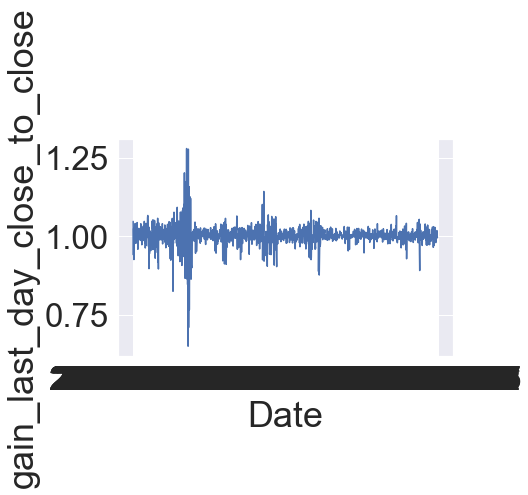

In [186]:
sns.lineplot(data=upro_data, x="Date", y="gain_last_day_close_to_close")
